In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [8]:
target_user = ['@BBCNews', '@CBSNews', '@CNN', '@FoxNews', '@NYT']

In [16]:
df = pd.DataFrame({"@BBCNews":'',
                   "@CBSNews":'',
                   "@CNN":'',
                   "@FoxNews":'',
                   "@NYT":''}, index=[0])

In [17]:
for user in target_user:
    counter = 0
    for status in tweepy.Cursor(api.user_timeline, id=user).items(100):
        text = status.text
        compound = analyzer.polarity_scores(text)["compound"]
        
        df.set_value(counter, user, compound)
        counter = counter + 1

In [18]:
df.head()

,@BBCNews,@CBSNews,@CNN,@FoxNews,@NYT
0,0.0258,-0.7506,0.015,-0.34,0
1,-0.0772,-0.6486,-0.296,0.6597,0
2,-0.34,-0.8807,0.6926,0.4019,0
3,0,0.4754,-0.4404,0.296,0
4,-0.5719,-0.9246,0,-0.5267,-0.4404


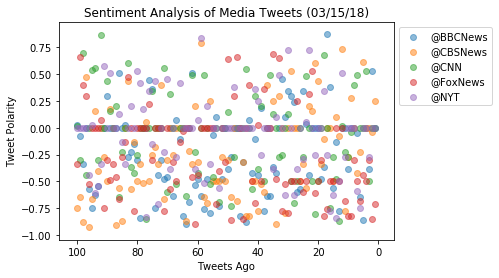

In [30]:
x = np.arange(100, 0, -1)
a = plt.scatter(x, df['@BBCNews'], alpha=0.5)
b = plt.scatter(x, df['@CBSNews'], alpha=0.5)
c = plt.scatter(x, df['@CNN'], alpha=0.5)
d = plt.scatter(x, df['@FoxNews'], alpha=0.5)
e = plt.scatter(x, df['@NYT'], alpha=0.5)
plt.title('Sentiment Analysis of Media Tweets (03/15/18)')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.gca().invert_xaxis()
plt.legend((a,b,c,d,e),('@BBCNews', '@CBSNews','@CNN', '@FoxNews', '@nytimes'),numpoints=1, loc='upper right', ncol=1, fontsize=8)
lgd = plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('scatter_plot.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [26]:
df_mean = df.mean()

df_mean.head()

@BBCNews   -0.216820
@CBSNews   -0.217376
@CNN       -0.071934
@FoxNews   -0.234780
@NYT       -0.051429
dtype: float64

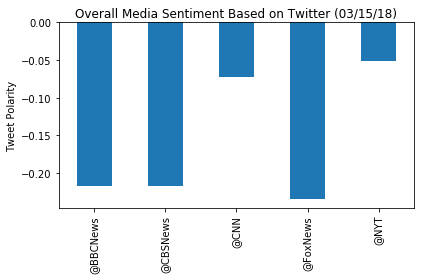

In [31]:
df_mean.plot(kind='bar')
plt.title('Overall Media Sentiment Based on Twitter (03/15/18)')
plt.ylabel('Tweet Polarity')
plt.savefig('Overall Media Sentiment.png')
plt.tight_layout()
plt.show()